In [1]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl
import statsmodels.api as sm

import os
import json
s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json'));
pl.rcParams.update(s)


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


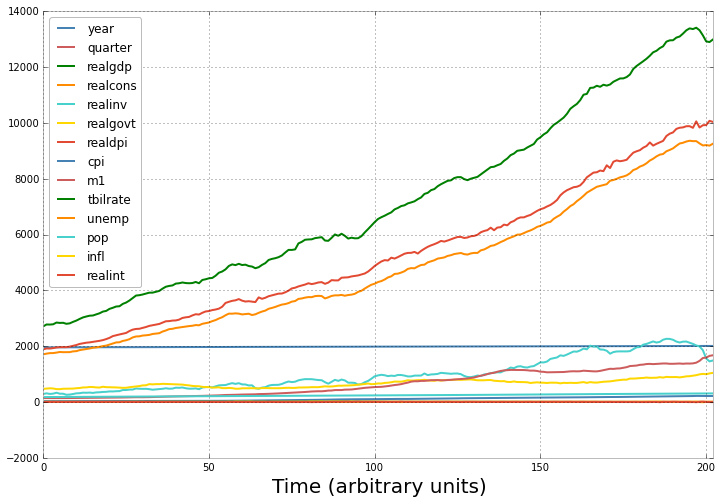

In [3]:
alldata = sm.datasets.macrodata.load_pandas().data

alldata.plot(figsize=(12,8));
pl.xlabel("Time (arbitrary units)", fontsize=20)


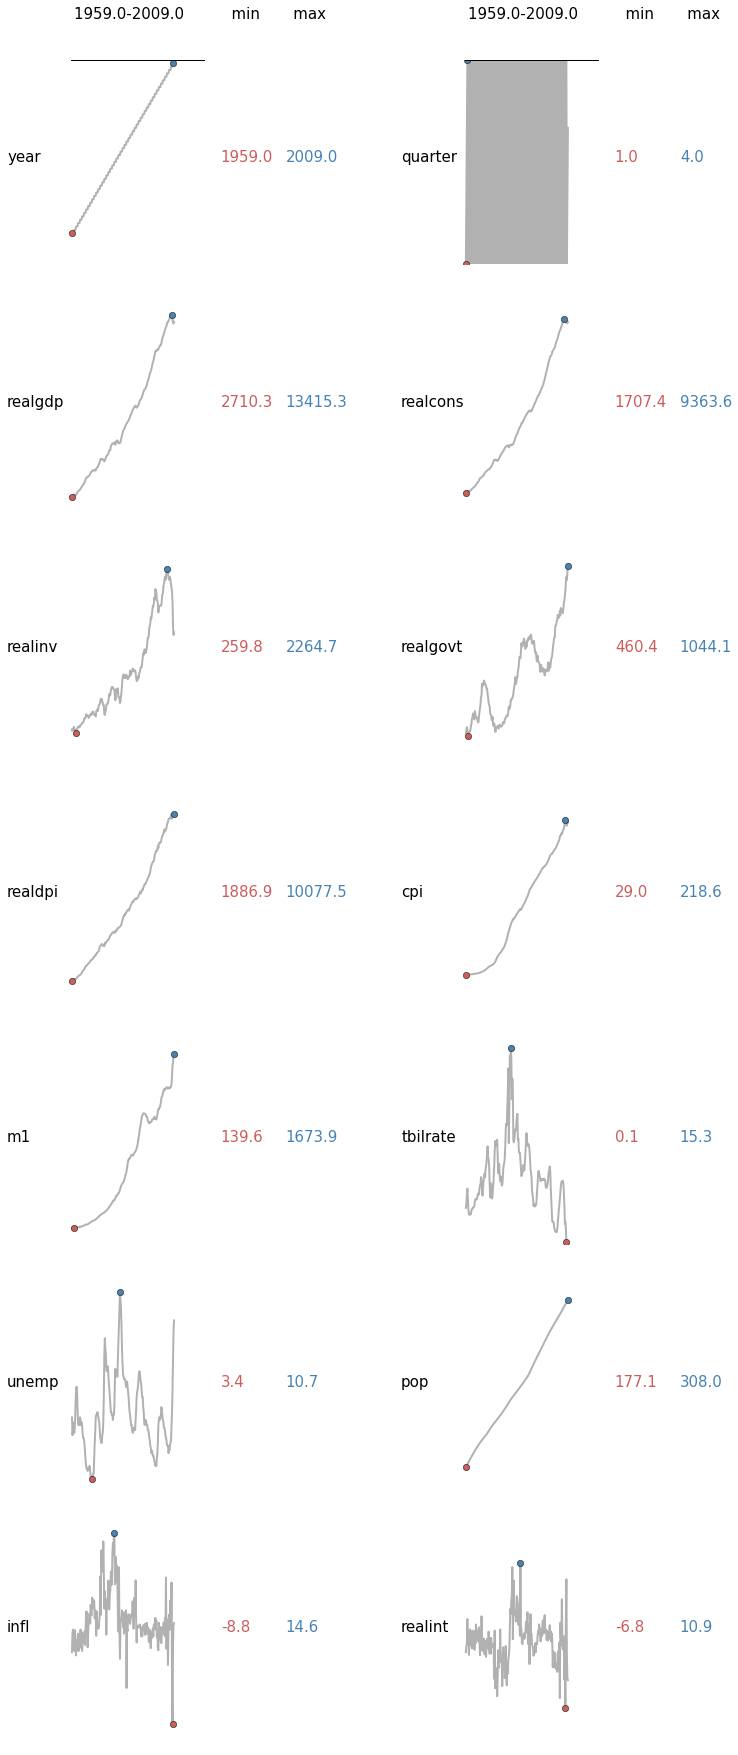

In [13]:
fig = pl.figure(figsize = (10,30))
ax = []
for i, data in enumerate(alldata.values.T):
        x2 = 0 if i%2 == 0 else 2
        ax.append(pl.subplot2grid((7,3), ((i/2), x2)))
        ax[i].plot(data, 'k', alpha=0.3)
        ax[i].axis('off')
        ax[i].set_xlim(-len(data)*0.3, len(data)*1.3)
        try:
            ax[i].plot(np.where(data == max(data))[0], max(data), 'o')
        except ValueError:
            ax[i].plot(np.where(data == max(data))[0][0], max(data), 'o')
        try:
            ax[i].plot(np.where(data == min(data))[0], min(data), 'o')
        except ValueError:
            ax[i].plot(np.where(data == min(data))[0][0], min(data), 'o')
        ax[i].text(1.1, 0.5, "%.1f"%(min(data)), fontsize = 15, 
                   transform = ax[i].transAxes, color='IndianRed')
        ax[i].text(1.5, 0.5, "%.1f"%(max(data)), fontsize = 15, 
                   transform = ax[i].transAxes, color='SteelBlue')
        ax[i].text(-0.2, 0.5, alldata.columns[i], fontsize = 15, 
                   transform = ax[i].transAxes)
        if i<2:
            ax[i].plot((0,ax[i].get_xlim()[1]), 
                    (ax[i].get_ylim()[1], ax[i].get_ylim()[1]), 'k-',)

ax[0].text (0.2, 1.2, '{0:1}-{1:2}          {2:2s}       {3:2s}'.format(
            alldata['year'].iloc[0], alldata['year'].iloc[-1],'min','max'), 
            transform = ax[0].transAxes, fontsize=15)
ax[1].text (0.2, 1.2, '{0:1}-{1:2}          {2:2s}       {3:2s}'.format(
            alldata['year'].iloc[0], alldata['year'].iloc[-1],'min','max'), 
            transform = ax[1].transAxes, fontsize=15)